# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [58]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = {
    "City": [],
    "Cloudiness": [],
    "Country": [],
    "Date": [],
    "Humidity": [],
    "Lat": [],
    "Lng": [],
    "Max Temp": [],
    "Wind Speed": []
    }

In [81]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# looping to create dataframe columns, appending city info to list
print("Beginning Data Retrieval     ")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    # Skip if no city is found
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | sabang
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | chisec
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | kapuskasing
Processing Record 9 of Set 1 | mugia
Processing Record 10 of Set 1 | altay
Processing Record 11 of Set 1 | cascais
Processing Record 12 of Set 1 | ewo
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | minas de marcona
City not found. Skipping...
Processing Record 19 of Set 1 | cavelossim
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | georgetown
Processing Record 22 

In [82]:
 # create a dictionary for establishing dataframe
city_data = {
    "City":city_name,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [83]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [84]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sabang,100,ID,1686504984,79,5.8933,95.3214,83.53,21.32
1,tiksi,100,RU,1686504984,98,71.6872,128.8694,30.85,15.10
2,longyearbyen,75,SJ,1686504984,75,78.2186,15.6401,40.84,12.66
3,chisec,92,GT,1686504984,31,15.8167,-90.2833,97.03,4.52
4,port mathurin,45,CD,1686504985,56,-7.0349,29.7638,78.49,1.79


In [85]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [86]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,sabang,100,ID,1686504984,79,5.8933,95.3214,83.53,21.32
1,tiksi,100,RU,1686504984,98,71.6872,128.8694,30.85,15.10
2,longyearbyen,75,SJ,1686504984,75,78.2186,15.6401,40.84,12.66
3,chisec,92,GT,1686504984,31,15.8167,-90.2833,97.03,4.52
4,port mathurin,45,CD,1686504985,56,-7.0349,29.7638,78.49,1.79


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

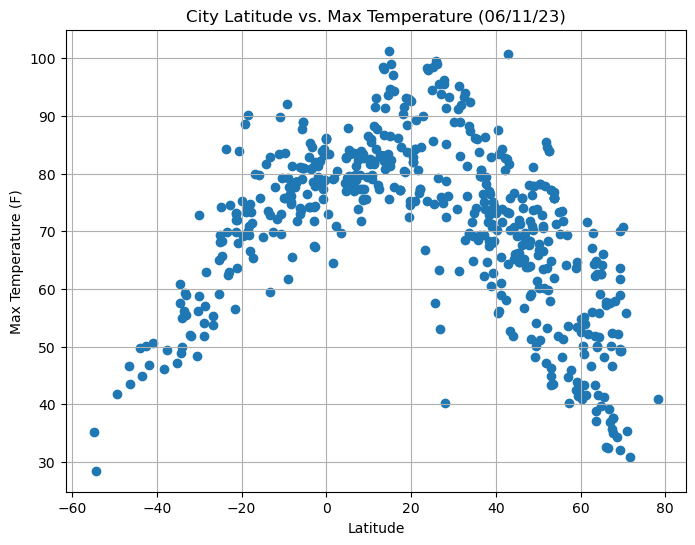

In [87]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(lats, max_temps, linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

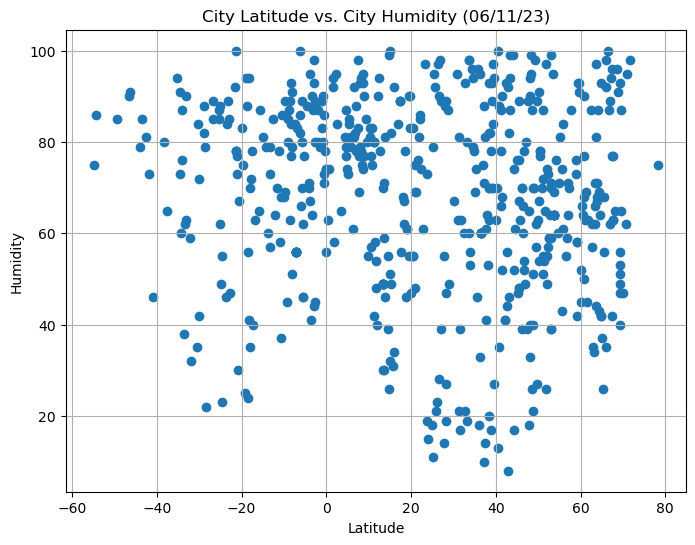

In [88]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(lats, humidities, linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. City Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

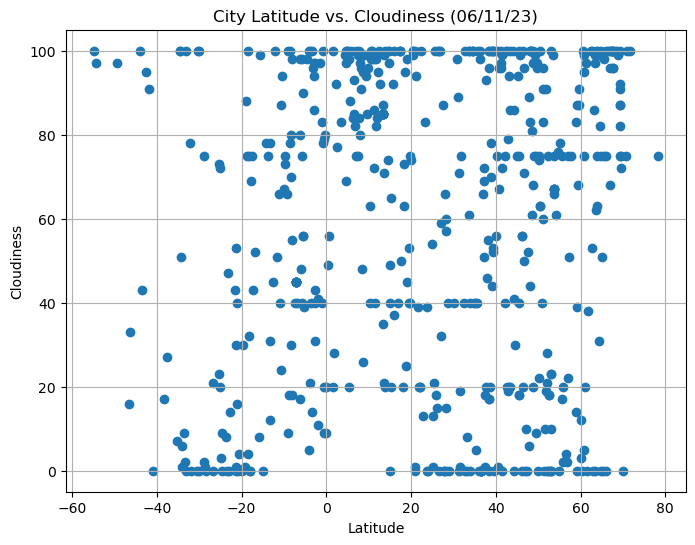

In [89]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(lats, cloudinesses, linewidths=1, marker="o")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

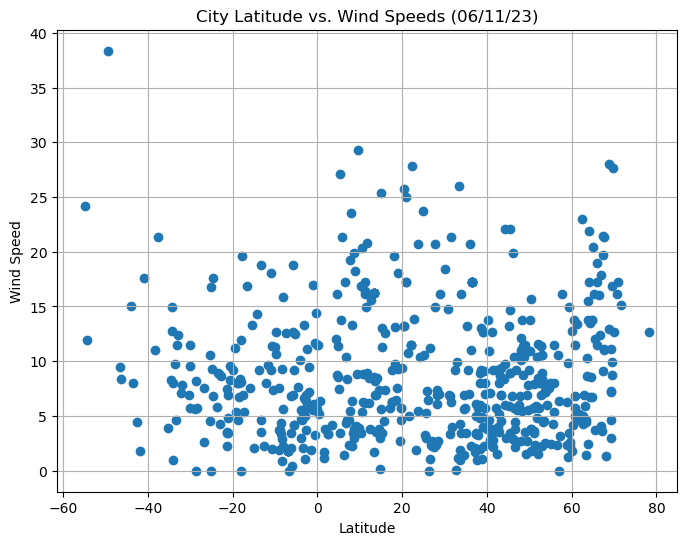

In [90]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(lats, wind_speeds, linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speeds (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    fig1, ax1 = plt.subplots(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere: {x_label} vs {y_label}" ,fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    print(f"r-squared: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"correlation: {round(correlation[0],2)}")


In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,sabang,100,ID,1686504984,79,5.8933,95.3214,83.53,21.32
1,tiksi,100,RU,1686504984,98,71.6872,128.8694,30.85,15.10
2,longyearbyen,75,SJ,1686504984,75,78.2186,15.6401,40.84,12.66
3,chisec,92,GT,1686504984,31,15.8167,-90.2833,97.03,4.52
5,badger,0,US,1686504985,42,64.8000,-147.5333,62.51,13.80


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
4,port mathurin,45,CD,1686504985,56,-7.0349,29.7638,78.49,1.79
6,papatowai,16,NZ,1686504985,90,-46.5619,169.4708,46.62,9.44
11,ewo,78,CG,1686504986,80,-0.8725,14.8206,77.32,5.66
14,adamstown,72,PN,1686504987,62,-25.0660,-130.1015,69.33,16.80
15,avarua,1,CK,1686504987,100,-21.2078,-159.7750,69.85,3.44


###  Temperature vs. Latitude Linear Regression Plot

r-squared: 0.5142612735046174
correlation: -0.72


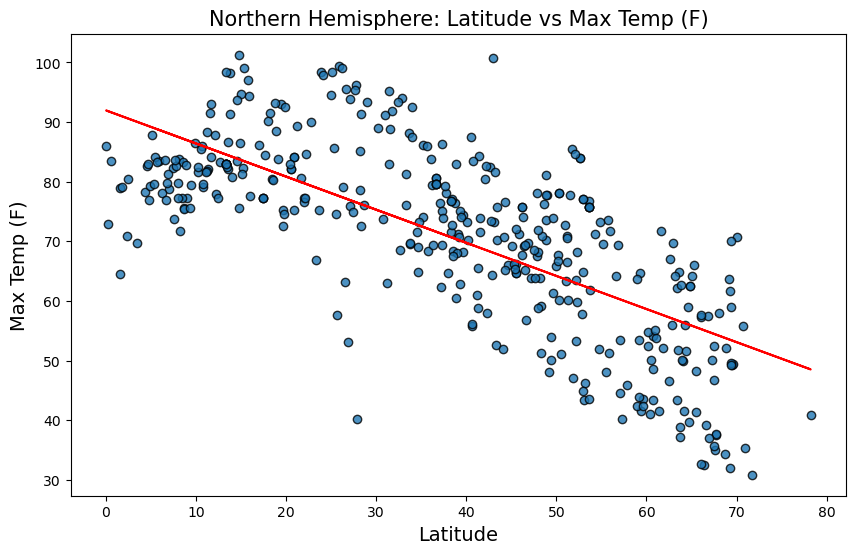

In [109]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
plot_linear_regression(x, y, "Latitude", "Max Temp (F)", "Northern", (10, 10))

r-squared: 0.7267029553085625
correlation: 0.85


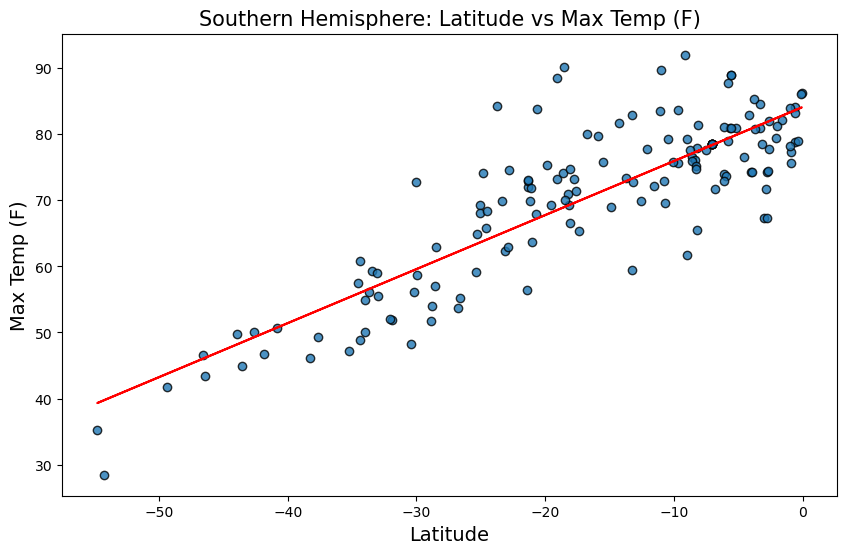

In [110]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
plot_linear_regression(x, y, "Latitude", "Max Temp (F)", "Southern", (10, 10))

**Discussion about the linear relationship:** Both hemispheres show strong correlations. The northern hemisphere has a higher correlation value and lower r-squared value which indicates that as you move further north, the max temperature is dropping more linearly.

### Humidity vs. Latitude Linear Regression Plot

r-squared: 0.0044722703963237685
correlation: -0.07


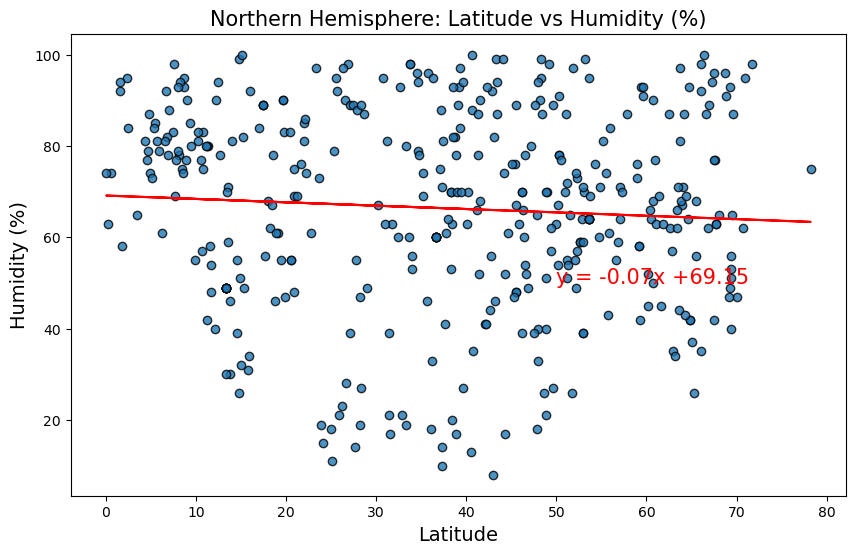

In [114]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

r-squared: 0.0009705416922076719
correlation: 0.03


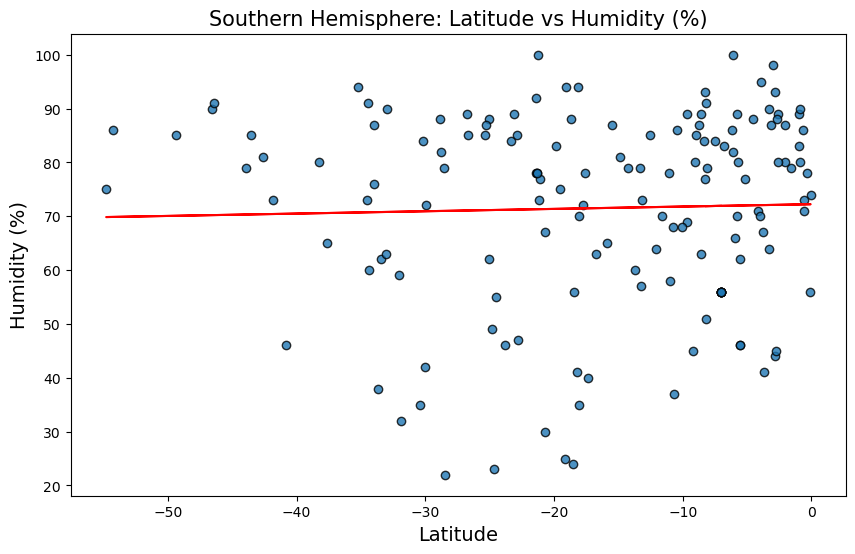

In [119]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity (%)", "Southern",(50,50))
plt.savefig("./southern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation and linear relationship between humidity and latitude for both northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.004805172101069635
correlation: -0.07


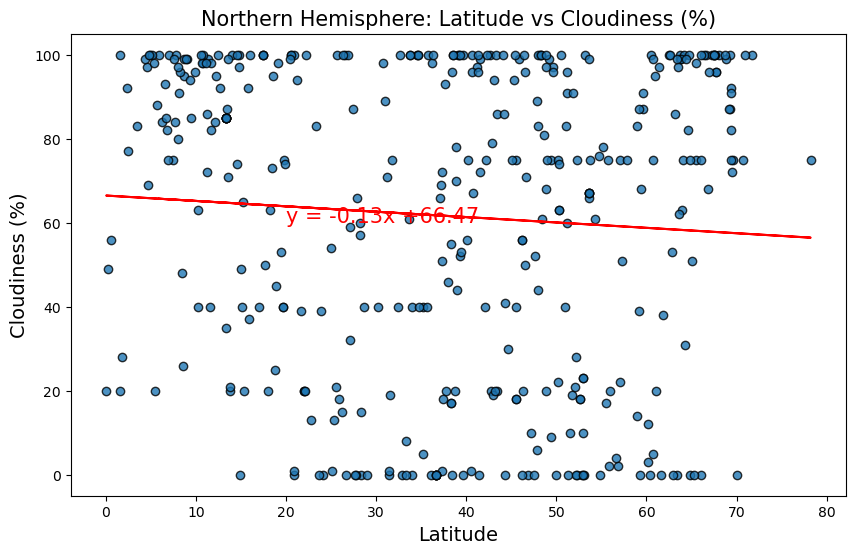

In [117]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

r-squared: 0.023280684461647546
correlation: 0.15


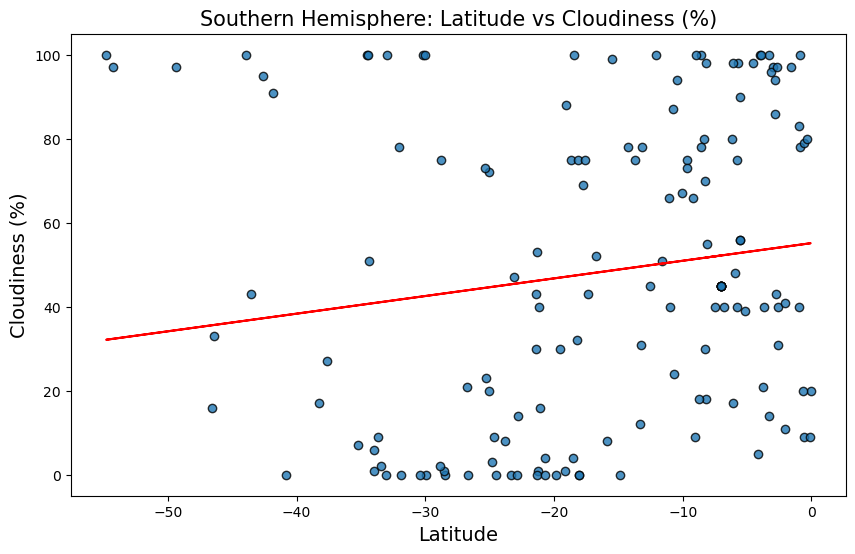

In [118]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness (%)", "Southern", (20, 60))

plt.savefig("./southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** Both northern and southern show scattered values across the entire plot, there is no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 0.0004688143303369038
correlation: -0.02


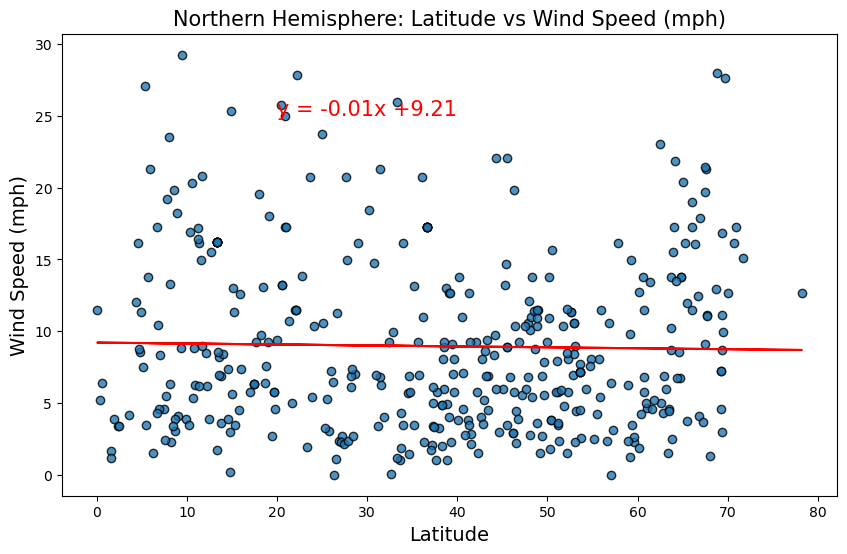

In [120]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

r-squared: 0.09363283724375673
correlation: -0.31


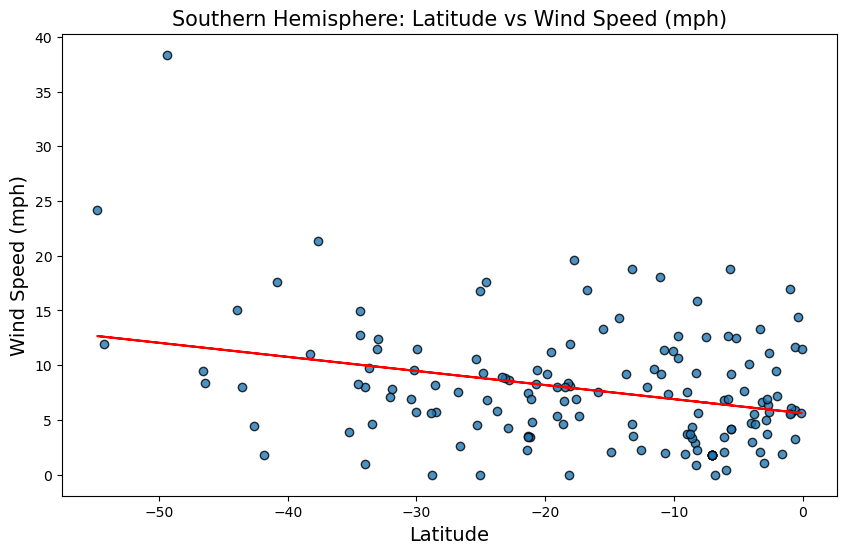

In [121]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed (mph)", "Southern",(20, 25))
plt.savefig("./southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** No linear relationship for wind speed and latitude in the northern and southern hemisphere. Both plots show scattered values across the latitudes.